In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 파일 한 번에 불러오기
# global 변수 사용하기
for i in range(1,8):
    globals()[f'case_{i}'] = pd.read_csv(f'case_{i}.csv', index_col=0)

In [36]:
# 파일 불러오기
# case_1 =  pd.read_csv('case_1.csv', index_col=0)
# case_2 =  pd.read_csv('case_2.csv', index_col=0)
# case_3 =  pd.read_csv('case_3.csv', index_col=0)
# case_4 =  pd.read_csv('case_4.csv', index_col=0)
# case_5 =  pd.read_csv('case_5.csv', index_col=0)
# case_6 =  pd.read_csv('case_6.csv', index_col=0)
# case_7 =  pd.read_csv('case_7.csv', index_col=0)

# 미분값으로 구하면 센서 오류 때문에 제대로 안 구해짐..

### 함수1 - 기울기 구하기

In [3]:
# 기울기 구하는 함수
# 리스트로 기울기 반환함
def diff_search(df_name):
    diff = []
    for i in range(len(df_name)):
        if i == 0:
            diff.append(0)
        else:
            # 데이터프레임 형태 달라지면 이거 바꿔야 함
            diff.append(df_name['1'][i] - df_name['1'][i-1])
    return diff

In [4]:
# 변수 여러개 선언 후 불러오기
# global로 설정해서 불러오기

for i in range(1,8):
    globals()[f'case_{i}_diff'] = diff_search(globals()[f'case_{i}'])

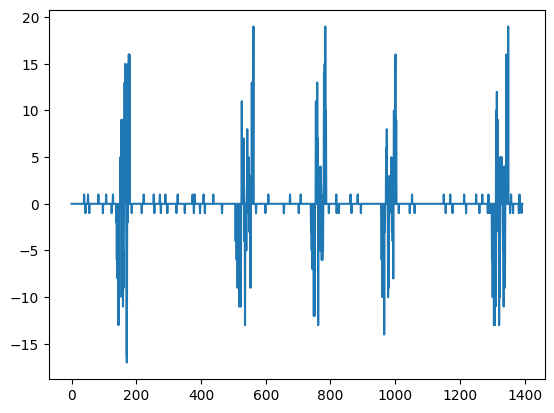

In [5]:
plt.plot(case_3_diff)

# 시작
1. 노이즈 제거
2. 기울기 0이 아닌 값 넣기
3. 2번 리스트에서 곱이 음수가 되는 부분 찾기
4. 이를 통해 변하는 부분 확인, 기울기 - 에서 + 로 바뀌면 한 명 지나감
5. +에서 자르는 방법 고민 필요

In [6]:
# 1. noise 제거
for i, diff in enumerate(case_3_diff):
    if -4 < diff < 4:
        case_3_diff[i] = 0

In [27]:
# 2. 기울기 0이 아닌 값 리스트에 넣기
temp_list = []

# 기울기 곱이 마이너스인 부분 저장 리스트
diff_mul_minus= []

# i는 번째, diff는 기울기 값
for i, diff in enumerate(case_3_diff):
    # 기울기가 0이면 넘어가기
    if diff == 0:
        continue
    # 기울기가 0이 아니면
    else:
        # temp_list에 기울기 집어넣기
        temp_list.append([i,diff])

In [28]:
print(temp_list, end = ' ')

[[140, -6.0], [142, -8.0], [143, -5.0], [145, -13.0], [148, -10.0], [151, 5.0], [154, 9.0], [156, 9.0], [157, -10.0], [159, -11.0], [160, -5.0], [161, -9.0], [164, 13.0], [166, 15.0], [168, 4.0], [170, -16.0], [171, -17.0], [174, 15.0], [176, 9.0], [177, 16.0], [179, 16.0], [507, -4.0], [510, -6.0], [513, -9.0], [515, -5.0], [518, -11.0], [521, -11.0], [523, -11.0], [526, 11.0], [528, 6.0], [532, 7.0], [534, -4.0], [536, -13.0], [540, -5.0], [543, 8.0], [547, 5.0], [553, -9.0], [557, 13.0], [559, 8.0], [561, 8.0], [562, 19.0], [742, -5.0], [744, -7.0], [745, -5.0], [748, -12.0], [749, -12.0], [751, -12.0], [755, 11.0], [757, 4.0], [759, 13.0], [761, 7.0], [762, -13.0], [765, -4.0], [766, -4.0], [768, -5.0], [769, 4.0], [773, -6.0], [775, -6.0], [777, -5.0], [780, 14.0], [782, 15.0], [784, 19.0], [786, 10.0], [958, -6.0], [960, -10.0], [962, -6.0], [964, -7.0], [966, -14.0], [972, 6.0], [974, 8.0], [978, -10.0], [980, -9.0], [988, 5.0], [992, -4.0], [994, -8.0], [996, 10.0], [998, 6.0],

In [16]:
temp_list

[[140, -6.0],
 [142, -8.0],
 [143, -5.0],
 [145, -13.0],
 [148, -10.0],
 [151, 5.0],
 [154, 9.0],
 [156, 9.0],
 [157, -10.0],
 [159, -11.0],
 [160, -5.0],
 [161, -9.0],
 [164, 13.0],
 [166, 15.0],
 [168, 4.0],
 [170, -16.0],
 [171, -17.0],
 [174, 15.0],
 [176, 9.0],
 [177, 16.0],
 [179, 16.0],
 [507, -4.0],
 [510, -6.0],
 [513, -9.0],
 [515, -5.0],
 [518, -11.0],
 [521, -11.0],
 [523, -11.0],
 [526, 11.0],
 [528, 6.0],
 [532, 7.0],
 [534, -4.0],
 [536, -13.0],
 [540, -5.0],
 [543, 8.0],
 [547, 5.0],
 [553, -9.0],
 [557, 13.0],
 [559, 8.0],
 [561, 8.0],
 [562, 19.0],
 [742, -5.0],
 [744, -7.0],
 [745, -5.0],
 [748, -12.0],
 [749, -12.0],
 [751, -12.0],
 [755, 11.0],
 [757, 4.0],
 [759, 13.0],
 [761, 7.0],
 [762, -13.0],
 [765, -4.0],
 [766, -4.0],
 [768, -5.0],
 [769, 4.0],
 [773, -6.0],
 [775, -6.0],
 [777, -5.0],
 [780, 14.0],
 [782, 15.0],
 [784, 19.0],
 [786, 10.0],
 [958, -6.0],
 [960, -10.0],
 [962, -6.0],
 [964, -7.0],
 [966, -14.0],
 [972, 6.0],
 [974, 8.0],
 [978, -10.0],
 [980

In [58]:
len(temp_list)

104

In [118]:
# 3~5

pass_point = []

for i in range(len(temp_list)):
    
    # 시작인 0번째 값 넣어주기
    if i == 0:
        pass_point.append(temp_list[i][0])
    # 사람이 지나갈 때 기울기는 -에서 +로 바뀜
    # +에서 -는 사람이 한 번 지나갔다는 걸 의미
    
    # 뒷부분에 i+1을 사용하므로 에러 뜨므로 브레이크 걸어주기
    if i+2 == len(temp_list):
        print(i+2)
        # 마지막 값 넣어주기
        pass_point.append(temp_list[-1][0])
        break

    if temp_list[i][1] > 0:
        # 곱이 마이너스라면
        if temp_list[i][1] * temp_list[i+1][1] < 0:
            #마이너스 시작 지점 저장하기
            pass_point.append(temp_list[i+1][0])

104


In [119]:
# 사람 감지 시작점만 리스트로 받기
# 1339만 에러임
print(len(pass_point))
print(pass_point, end = ' ')

17
[140, 157, 170, 507, 534, 553, 742, 762, 773, 958, 978, 992, 1299, 1321, 1333, 1339, 1349] 

## 이제 번호리스트를 만들자

In [120]:
# 1339만 에러임
del pass_point[-2]

In [121]:
print(pass_point)
len(pass_point)

[140, 157, 170, 507, 534, 553, 742, 762, 773, 958, 978, 992, 1299, 1321, 1333, 1349]


16

# 이제 pass_point로 호출하자

In [122]:
start = pass_point
end = []

# 첫 값인 140은 제외하기 위해 1부터 시작
for i in range(1, len(temp_list)):
    if temp_list[i][0] in start:
        end.append(temp_list[i-1][0])
# 맨 마지막 바로 앞 값이 들어가 있어서 pop으로 빼주기
end.pop()
end.append(pass_point.pop())

In [123]:
print(start, len(start))
print(end)

[140, 157, 170, 507, 534, 553, 742, 762, 773, 958, 978, 992, 1299, 1321, 1333] 15
[156, 168, 179, 532, 547, 562, 761, 769, 786, 974, 988, 1003, 1317, 1331, 1349]


In [124]:
case_3_fluc = []

for i in range(len(start)):
    # 마스크 씌우고
    temp_start = start[i]
    temp_end = end[i]
    # 뽑기
    case_3_fluc.append(case_3['1'][temp_start:temp_end])

In [125]:
len(case_3_fluc)

15

In [133]:
# case 5의 변동 뽑기 완료
case_3_fluc[5]

553     86.0
554     86.0
555     87.0
556     87.0
557    100.0
558    100.0
559    108.0
560    108.0
561    116.0
Name: 1, dtype: float64

In [138]:
# 리스트 저장하기 위한 피클 라이브러리
import pickle

In [135]:
 with open('case_3_fluc.pkl','wb') as f:
    pickle.dump(case_3_fluc,f)

In [136]:
 with open('case_3_fluc.pkl','rb') as f:
    temp_temp = pickle.load(f)

# 함수 만들어보자

In [185]:
# 기울기 구하는 함수
# 리스트로 기울기 반환함
def diff_search(df_name):
    diff = []
    for i in range(len(df_name)):
        if i == 0:
            diff.append(0)
        else:
            # 데이터프레임 형태 달라지면 이거 바꿔야 함
            diff.append(df_name['1'][i] - df_name['1'][i-1])
    return diff

# 변수 여러개 선언 후 불러오기
# global로 설정해서 불러오기

for i in range(1,8):
    globals()[f'case_{i}_diff'] = diff_search(globals()[f'case_{i}'])

# 여기는 noise 제거하는 함수
def del_noise(diff_list):
    for i, diff in enumerate(diff_list):
        if -4 < diff < 4:
            diff_list[i] = 0
    return diff_list

def make_diff_list(diff_list):
    # 2. 기울기 0이 아닌 값 리스트에 넣기
    temp_list = []
    # i는 번째, diff는 기울기 값
    for i, diff in enumerate(diff_list):
        # 기울기가 0이면 넘어가기
        if diff == 0:
            continue
        # 기울기가 0이 아니면
        else:
            # temp_list에 기울기 집어넣기
            temp_list.append([i,diff])
    return temp_list

def make_pass_point(temp_list):
    pass_point = []

    for i in range(len(temp_list)):
        
        # 시작인 0번째 값 넣어주기
        if i == 0:
            pass_point.append(temp_list[i][0])
        # 사람이 지나갈 때 기울기는 -에서 +로 바뀜
        # +에서 -는 사람이 한 번 지나갔다는 걸 의미
        
        # 뒷부분에 i+1을 사용하므로 에러 뜨므로 브레이크 걸어주기
        if i+2 == len(temp_list):
            print(i+2)
            # 마지막 값 넣어주기
            pass_point.append(temp_list[-1][0])
            break

        if temp_list[i][1] > 0:
            # 곱이 마이너스라면
            if temp_list[i][1] * temp_list[i+1][1] < 0:
                #마이너스 시작 지점 저장하기
                pass_point.append(temp_list[i+1][0])
    return pass_point, temp_list

def fin_start_end(pass_point, temp_list):
    start = pass_point
    end = []

    # 첫 값인 140은 제외하기 위해 1부터 시작
    for i in range(1, len(temp_list)):
        if temp_list[i][0] in start:
            end.append(temp_list[i-1][0])
    # 맨 마지막 바로 앞 값이 들어가 있어서 pop으로 빼주기
    end.pop()
    end.append(pass_point.pop())
    return start, end

# 몇번째 케이스?
def find_fluc(n, start, end):
    globals()[f'case_{n}_fluc'] = []

    for i in range(len(start)):
        # 마스크 씌우고
        temp_start = start[i]
        temp_end = end[i]
        # 뽑기
        globals()[f'case_{n}_fluc'].append(globals()[f'case_{n}']['1'][temp_start:temp_end])

    return globals()[f'case_{n}_fluc']



In [176]:
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_1_diff)))

131


In [177]:
start, end = fin_start_end(pass_point, temp_list)

In [181]:
find_fluc(1, start, end), len(case_1_fluc)

([207    125.0
  208    125.0
  209    117.0
  210    117.0
  211    106.0
  212    106.0
  213    106.0
  214     99.0
  215     99.0
  216     99.0
  217     89.0
  218     89.0
  219     78.0
  220     78.0
  221     78.0
  222     69.0
  223     69.0
  224     73.0
  225     73.0
  226     73.0
  227     88.0
  228     88.0
  229     97.0
  230     97.0
  231     97.0
  232    116.0
  Name: 1, dtype: float64,
  325    128.0
  326    120.0
  327    120.0
  328    114.0
  329    114.0
  330    101.0
  331    101.0
  332     87.0
  333     75.0
  334     75.0
  335     85.0
  336     85.0
  337     88.0
  338     88.0
  339     96.0
  340    114.0
  341    114.0
  342    123.0
  343    123.0
  Name: 1, dtype: float64,
  701     93.0
  702     93.0
  703    108.0
  704    108.0
  705    126.0
  706    126.0
  707    126.0
  Name: 1, dtype: float64,
  767    126.0
  768    126.0
  769    116.0
  770    102.0
  771    102.0
  772     85.0
  773     85.0
  774     78.0
  775      0.0
  77

In [ ]:
# 리스트 저장하기 위한 피클 라이브러리
import pickle

In [182]:
with open('case_1_fluc.pkl','wb') as f:
   pickle.dump(case_1_fluc,f)

In [183]:
 with open('case_1_fluc.pkl','rb') as f:
    temp_temp = pickle.load(f)

In [184]:
temp_temp

[207    125.0
 208    125.0
 209    117.0
 210    117.0
 211    106.0
 212    106.0
 213    106.0
 214     99.0
 215     99.0
 216     99.0
 217     89.0
 218     89.0
 219     78.0
 220     78.0
 221     78.0
 222     69.0
 223     69.0
 224     73.0
 225     73.0
 226     73.0
 227     88.0
 228     88.0
 229     97.0
 230     97.0
 231     97.0
 232    116.0
 Name: 1, dtype: float64,
 325    128.0
 326    120.0
 327    120.0
 328    114.0
 329    114.0
 330    101.0
 331    101.0
 332     87.0
 333     75.0
 334     75.0
 335     85.0
 336     85.0
 337     88.0
 338     88.0
 339     96.0
 340    114.0
 341    114.0
 342    123.0
 343    123.0
 Name: 1, dtype: float64,
 701     93.0
 702     93.0
 703    108.0
 704    108.0
 705    126.0
 706    126.0
 707    126.0
 Name: 1, dtype: float64,
 767    126.0
 768    126.0
 769    116.0
 770    102.0
 771    102.0
 772     85.0
 773     85.0
 774     78.0
 775      0.0
 776      0.0
 777     90.0
 778     90.0
 779    108.0
 780    118.

# 2번

In [186]:
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_2_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(2, start, end)
with open('case_2_fluc.pkl','wb') as f:
   pickle.dump(case_2_fluc,f)

131


In [190]:
# 4번
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_4_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(4, start, end)
with open('case_4_fluc.pkl','wb') as f:
   pickle.dump(case_4_fluc,f)

96


In [191]:
# 5번
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_5_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(5, start, end)
with open('case_5_fluc.pkl','wb') as f:
   pickle.dump(case_5_fluc,f)

227


In [192]:
# 6번
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_6_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(6, start, end)
with open('case_6_fluc.pkl','wb') as f:
   pickle.dump(case_6_fluc,f)

219


In [193]:
# 7번
pass_point, temp_list = make_pass_point(make_diff_list(del_noise(case_7_diff)))
start, end = fin_start_end(pass_point, temp_list)
find_fluc(7, start, end)
with open('case_7_fluc.pkl','wb') as f:
   pickle.dump(case_7_fluc,f)

206


In [ ]:
# 어느 정도 정확함
# 4, 7 확인하기
# 4는 하나 부족, 7은 하나 많음

# 그래프 그려서 정확하게 잘랐는지 확인하기

In [220]:
# 정확하게 잘랐는지 확인하기
# 1,2,3,5,6 정확하게 자름
for i in range(1,8):
    print(i,'번째'), print(len(globals()[f'case_{i}_fluc']))

1 번째
14
2 번째
15
3 번째
15
4 번째
14
5 번째
30
6 번째
25
7 번째
26


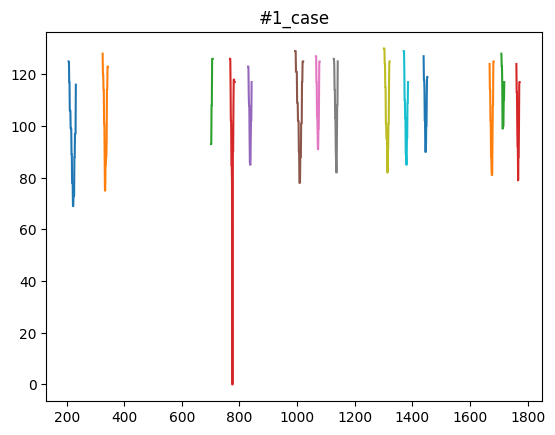

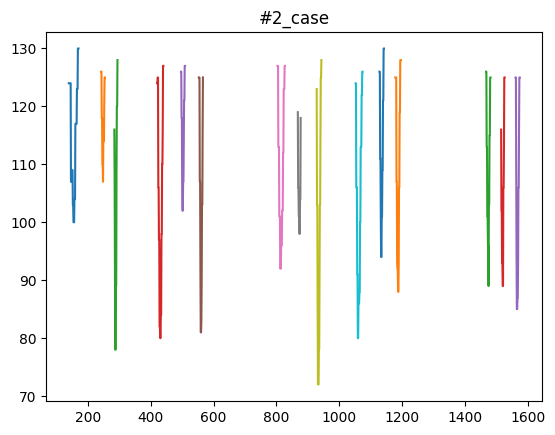

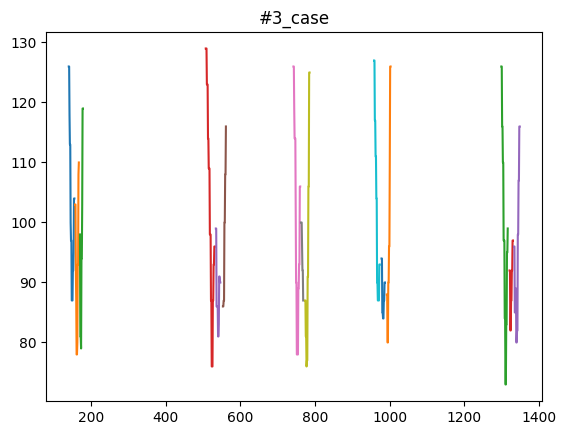

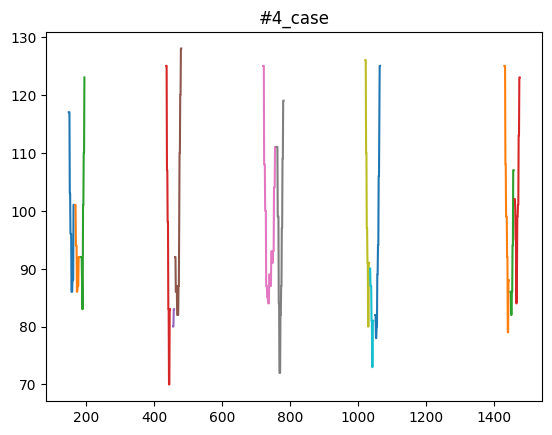

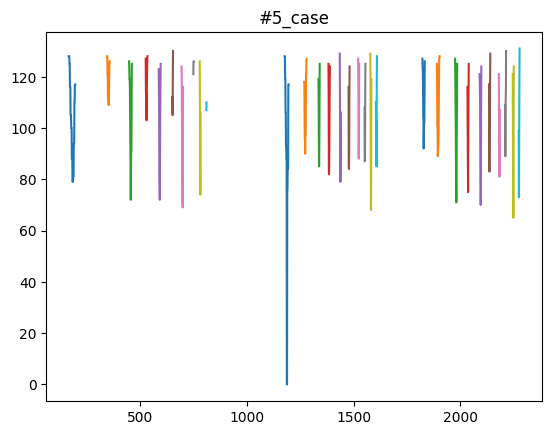

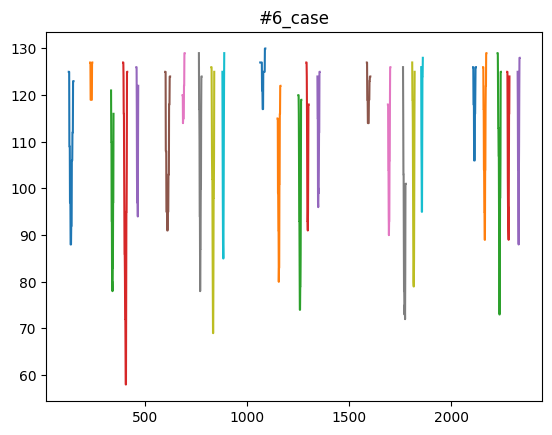

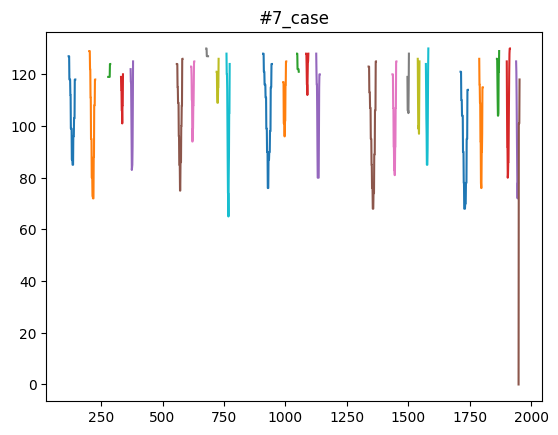

In [218]:
for i in range(1,8):
    graph = globals()[f'case_{i}_fluc']

    for j in range(len(graph)):
        plt.plot(graph[j])
    plt.title(f'#{i}_case')
    plt.savefig(f'#{i}_case_extraction.png')
    plt.show()

이 알고리즘은 참고용으로만 사용하기

1,2,3 완벽하게 검출

4 800번대 전후에서 하나 검출 못함

5번 700번대 전후에서 2개 애매하게 찍힘
